In [ ]:
import pandas as pd

# Load the dataset to understand its structure
file_path = 'combined_dataset.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,ds,AREA13,AREA17,AREA18,AREA19,AREA20,AREA21,AREA22,AREA23,AREA24,...,AREA57,AREA6,AREA60,Calgary,Central,Edmonton,Northeast,Northwest,South,System
0,2011-01-01 00:00:00,88.074635,72.479303,18.82104,138.61838,257.857343,84.96768,27.27024,26.277332,61.375534,...,59.015744,985.524051,1190.645294,1044.539795,1679.371701,1435.674681,1951.272821,1004.540852,1039.251320,8154.651171
1,2011-01-01 01:00:00,85.638316,71.626921,18.08736,137.12338,254.185227,83.56032,26.63632,25.391039,61.292160,...,56.509702,939.363308,1151.413283,995.873010,1651.468672,1387.974622,1945.992645,993.169326,1021.426382,7995.904656
2,2011-01-01 02:00:00,84.130155,70.904240,17.47680,135.78402,251.299487,82.72968,26.59756,25.011245,60.986664,...,54.802931,902.659208,1114.089958,957.462139,1639.158579,1343.982859,1944.300712,986.832400,1007.201302,7878.937991
3,2011-01-01 03:00:00,83.078551,69.762638,17.08464,134.79082,246.884896,82.10364,26.22180,24.679159,60.839997,...,53.585662,881.018019,1088.650737,934.603682,1630.763426,1313.840811,1933.741326,976.992997,996.544086,7786.486328
4,2011-01-01 04:00:00,83.425287,69.225483,16.79184,133.73284,244.874204,81.47784,26.14608,24.679125,61.194108,...,53.058469,873.526001,1074.278632,926.584469,1627.866294,1296.741189,1921.831303,972.631108,993.905752,7739.560116


In [ ]:
pip install nixtla>=0.5.1

In [ ]:

from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(api_key='nixtla-tok-UbFOqQKPNZ1iSPcTvl3pc9itrxp10aqEuIESFKI770cn7l7iIyE8csnaSPrhqJXudOwnuxO4XasrlcGQ')


In [ ]:
# Check for duplicate timestamps
duplicate_timestamps = df[df.duplicated(subset='ds', keep=False)]

# Check the difference between consecutive timestamps
df['ds'] = pd.to_datetime(df['ds'])
df['time_diff'] = df['ds'].diff()

# Display the results
duplicate_timestamps, df[['ds', 'time_diff']].head(10)


(Empty DataFrame
 Columns: [ds, AREA13, AREA17, AREA18, AREA19, AREA20, AREA21, AREA22, AREA23, AREA24, AREA25, AREA26, AREA27, AREA28, AREA29, AREA30, AREA31, AREA32, AREA33, AREA34, AREA35, AREA36, AREA37, AREA38, AREA39, AREA4, AREA40, AREA42, AREA43, AREA44, AREA45, AREA46, AREA47, AREA48, AREA49, AREA52, AREA53, AREA54, AREA55, AREA56, AREA57, AREA6, AREA60, Calgary, Central, Edmonton, Northeast, Northwest, South, System]
 Index: []
 
 [0 rows x 50 columns],
                    ds       time_diff
 0 2011-01-01 00:00:00             NaT
 1 2011-01-01 01:00:00 0 days 01:00:00
 2 2011-01-01 02:00:00 0 days 01:00:00
 3 2011-01-01 03:00:00 0 days 01:00:00
 4 2011-01-01 04:00:00 0 days 01:00:00
 5 2011-01-01 05:00:00 0 days 01:00:00
 6 2011-01-01 06:00:00 0 days 01:00:00
 7 2011-01-01 07:00:00 0 days 01:00:00
 8 2011-01-01 08:00:00 0 days 01:00:00
 9 2011-01-01 09:00:00 0 days 01:00:00)

In [ ]:
# Resample the data to a regular daily frequency
df.set_index('ds', inplace=True)
df_resampled = df.resample('D').mean()  # 'D' is for daily frequency

# Reset index to make 'ds' a column again
df_resampled = df_resampled.reset_index()

# Drop any rows with missing values that couldn't be filled by resampling
df_resampled.dropna(inplace=True)


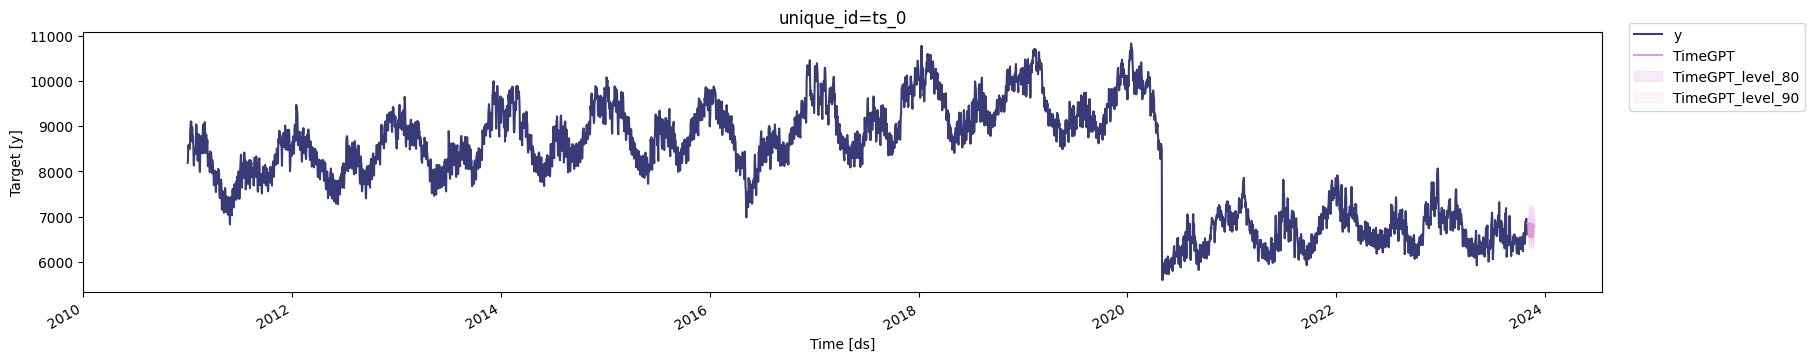

In [ ]:
# Retry the forecasting with the cleaned and resampled data
fcst_df = nixtla_client.forecast(
    df_resampled[['ds', 'System']].rename(columns={'System': 'y'}),  # Rename 'System' to 'y'
    h=24,                  # Forecast horizon (e.g., next 24 hours)
    time_col='ds',         # The column with timestamps
    target_col='y',        # The renamed target column
    level=[80, 90]         # Confidence levels
)

# Optional: Plotting the forecast results
nixtla_client.plot(
    df_resampled[['ds', 'System']].rename(columns={'System': 'y'}),  # Rename 'System' to 'y'
    fcst_df,
    level=[80, 90]
)


In [ ]:
file_path = 'combined_dataset.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])


df = df.drop_duplicates(subset=['ds'])

df.set_index('ds', inplace=True)
df_resampled = df.resample('D').mean()

df_resampled.dropna(inplace=True)

df_resampled = df_resampled.reset_index()


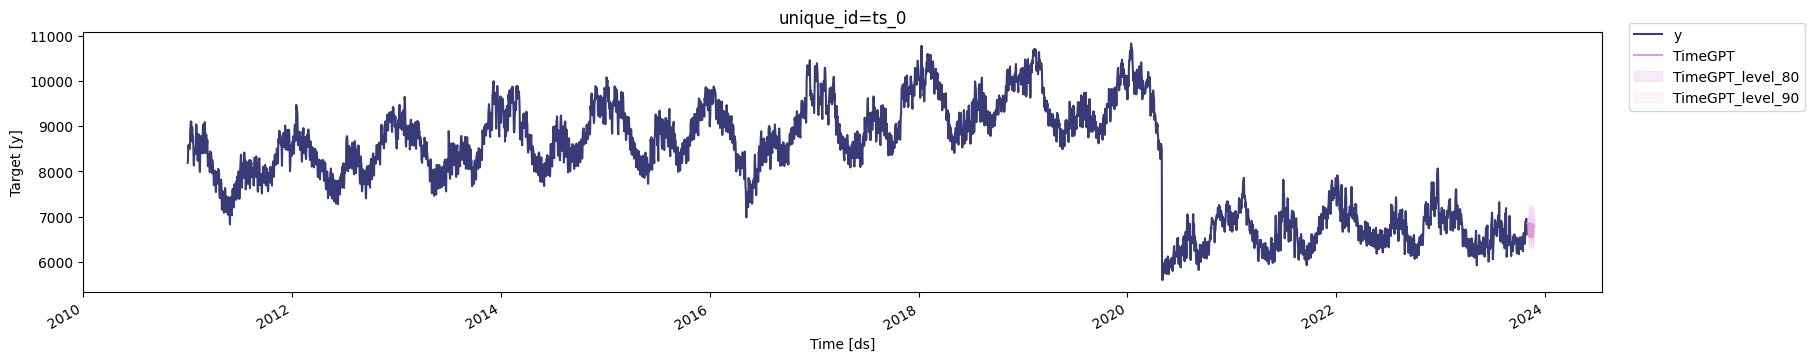

In [ ]:
fcst_df = nixtla_client.forecast(
    df_resampled[['ds', 'System']].rename(columns={'System': 'y'}),  # Rename 'System' to 'y'
    h=24,                  # Forecast horizon (e.g., next 24 hours)
    time_col='ds',         # The column with timestamps
    target_col='y',        # The renamed target column
    level=[80, 90]         # Confidence levels
)

# Optional: Plot the forecast results
nixtla_client.plot(
    df_resampled[['ds', 'System']].rename(columns={'System': 'y'}),  # Rename 'System' to 'y'
    fcst_df,
    level=[80, 90]
)

#Test train split


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

# Check for and handle duplicate timestamps
df = df.drop_duplicates(subset=['ds'])

# Resample the data to ensure consistent frequency (daily in this case)
df.set_index('ds', inplace=True)
df_resampled = df.resample('D').mean()  # 'D' stands for daily frequency

# Drop any rows with NaN values after resampling
df_resampled.dropna(inplace=True)

# Reset index to make 'ds' a column again
df_resampled = df_resampled.reset_index()

# Define the sizes for train, validation, and test sets
train_size = int(len(df_resampled) * 0.7)  # 70% for training
val_size = int(len(df_resampled) * 0.15)   # 15% for validation
test_size = len(df_resampled) - train_size - val_size  # 15% for testing

# Split the data
train_data = df_resampled[:train_size]
val_data = df_resampled[train_size:train_size + val_size]
test_data = df_resampled[train_size + val_size:]

# Print the size of each set for verification
print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")


Train size: 3280, Validation size: 703, Test size: 704


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np

Mean Squared Error (MSE): 433470.2876180157
Root Mean Squared Error (RMSE): 658.3846046332005


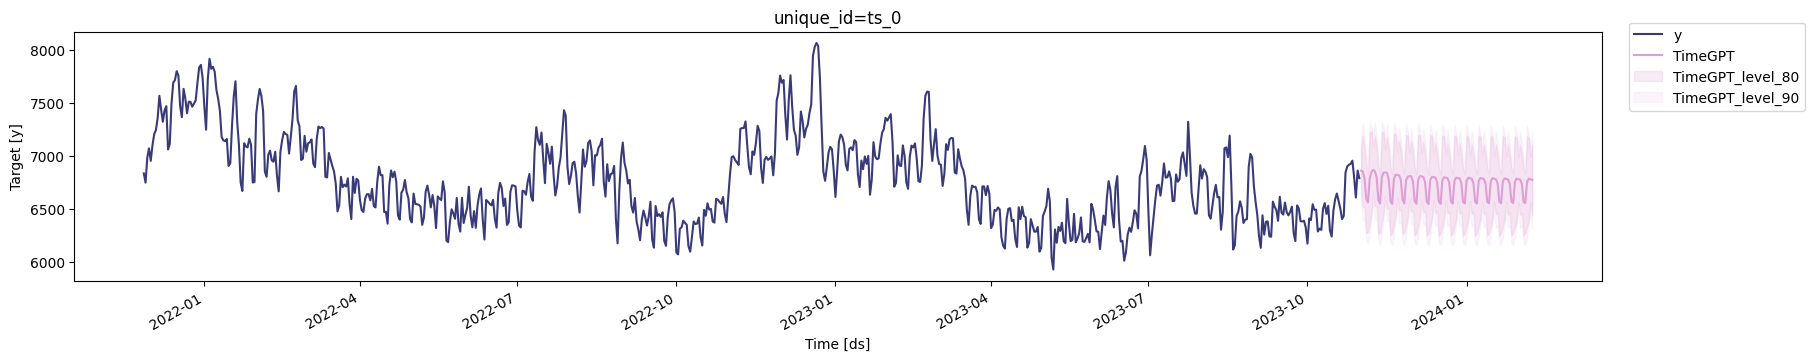

In [ ]:
forecast_horizon = min(len(test_data), 100)

# Forecasting on the test set
fcst_df = nixtla_client.forecast(
    test_data[['ds', 'System']].rename(columns={'System': 'y'}),  # Rename 'System' to 'y'
    h=forecast_horizon,         # Forecast horizon
    time_col='ds',              # The column with timestamps
    target_col='y',             # The renamed target column
    level=[80, 90]              # Confidence levels
)

# Use the 'TimeGPT' column for predictions
predictions = fcst_df['TimeGPT'].values

# Calculate MSE and RMSE
actuals = test_data['System'].values[:forecast_horizon]
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Optional: Plot the forecast results
nixtla_client.plot(
    test_data[['ds', 'System']].rename(columns={'System': 'y'}),  # Rename 'System' to 'y'
    fcst_df,
    level=[80, 90]
)

Final


In [56]:
import time
import pandas as pd
from nixtla import NixtlaClient
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Use the provided file path and name for the dataset
file_path = 'combined_dataset.xlsx'
df = pd.read_excel(file_path)

# Convert the 'ds' column to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Resample the data to ensure consistent frequency
df.set_index('ds', inplace=True)
df_resampled = df.resample('D').mean().dropna().reset_index()

# Split the data: reserve the last 96 time steps for the test set
test_df = df_resampled.tail(96)
input_df = pd.DataFrame({
    'ds': df_resampled.iloc[-1104:-96]['ds'].values,
    'System': df_resampled.iloc[-1104:-96]['System'].values
})

# Debugging: Confirm input_df structure
print("Final input_df structure:")
print(input_df.head())

# Initialize NixtlaClient with your API key
nixtla_client = NixtlaClient(api_key='nixtla-tok-UbFOqQKPNZ1iSPcTvl3pc9itrxp10aqEuIESFKI770cn7l7iIyE8csnaSPrhqJXudOwnuxO4XasrlcGQ')

# Forecasting with TimeGPT (without exogenous variables)
start = time.time()
fcst_df = nixtla_client.forecast(
    df=input_df,
    h=96,
    level=[90],
    finetune_steps=10,
    finetune_loss='mae',
    model='timegpt-1-long-horizon',
    time_col='ds',
    target_col='System'
)
end = time.time()
print(f"Time (TimeGPT): {end - start} seconds")

# Merge forecasts with actual data for evaluation
fcst_df['ds'] = pd.to_datetime(fcst_df['ds'])
test_df = pd.merge(test_df, fcst_df, how='left', on=['ds'])

# Calculate MAE and RMSE
mae = mean_absolute_error(test_df['System'], test_df['TimeGPT'])
rmse = np.sqrt(mean_squared_error(test_df['System'], test_df['TimeGPT']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Final input_df structure:
          ds       System
0 2020-10-23  6949.937131
1 2020-10-24  6841.185222
2 2020-10-25  6855.650852
3 2020-10-26  6928.570746
4 2020-10-27  6856.677055


Time (TimeGPT): 3.239903450012207 seconds
Mean Absolute Error (MAE): 238.16969398129336
Root Mean Squared Error (RMSE): 285.2096375964942


# Fine-tunning


In [ ]:
import pandas as pd
from nixtla import NixtlaClient
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize the NixtlaClient with your API key
nixtla_client = NixtlaClient(api_key='nixtla-tok-UbFOqQKPNZ1iSPcTvl3pc9itrxp10aqEuIESFKI770cn7l7iIyE8csnaSPrhqJXudOwnuxO4XasrlcGQ')

# Load your dataset
file_path = 'combined_dataset.xlsx'
df = pd.read_excel(file_path)

# Convert the 'ds' column to datetime and resample to ensure regular frequency
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)
df_resampled = df.resample('D').mean().dropna().reset_index()

# Define train and test datasets
train_df = df_resampled.iloc[:-96].copy()
test_df = df_resampled.iloc[-96:].copy()

# Fine-tune the TimeGPT model using MAE
timegpt_fcst_finetune_mae_df = nixtla_client.forecast(
    df=train_df[['ds', 'System']],
    h=96,
    finetune_steps=10,
    finetune_loss='mae',   # Set your desired loss function
    time_col='ds',
    target_col='System',
)

# Evaluate the predictions using MAE and RMSE
predictions = timegpt_fcst_finetune_mae_df['TimeGPT'].values

# Calculate MAE and RMSE using sklearn
mae_value = mean_absolute_error(test_df['System'], predictions)
rmse_value = np.sqrt(mean_squared_error(test_df['System'], predictions))

print(f"Fine-tuned MAE: {mae_value}")
print(f"Fine-tuned RMSE: {rmse_value}")
